# Analysis on English Premier League (2020-2022). 
Reference data is taken in from "https://fbref.com/en/comps/9/Premier-League-Stats"
the infrormation is save in file "matchs2.csv" hand contain all the EPL matches between sesasn 2020-2022

In [150]:
# Import depdelses
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame, Series

In [108]:
# Get data from file with panda
# Notis python 9.3 requere ipykernel
eplmatches = pd.read_csv("matches2.csv")
eplmatches

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2022-08-05,20:00,Premier League,Matchweek 1,Fri,Away,W,2.0,0.0,...,Match Report,NaN,10.0,2.0,14.6,1.0,0.0,0.0,2022,Arsenal
1,1,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,2.0,...,Match Report,NaN,19.0,7.0,13.0,0.0,0.0,0.0,2022,Arsenal
2,2,2022-08-20,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,0.0,...,Match Report,NaN,14.0,6.0,14.8,0.0,0.0,0.0,2022,Arsenal
3,3,2022-08-27,17:30,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,...,Match Report,NaN,22.0,8.0,15.5,1.0,0.0,0.0,2022,Arsenal
4,4,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,2.0,1.0,...,Match Report,NaN,22.0,8.0,16.3,1.0,0.0,0.0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,38,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0.0,2.0,...,Match Report,NaN,9.0,3.0,21.6,0.0,0.0,0.0,2021,Norwich City
1048,39,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0.0,4.0,...,Match Report,NaN,8.0,2.0,22.2,1.0,0.0,0.0,2021,Norwich City
1049,40,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0.0,3.0,...,Match Report,NaN,9.0,5.0,17.0,0.0,0.0,0.0,2021,Norwich City
1050,41,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1.0,1.0,...,Match Report,NaN,11.0,2.0,14.4,0.0,0.0,0.0,2021,Norwich City


In [109]:
eplmatches.shape
# resturn 1053 rows and 28 colums

(1052, 28)

# Task 2: Column explanation 
- date - match date 
- time - paly time
- comp - competation "Premier League, Euro League ect."
- round - league round 
- day - match day
- venue - team playing  at (home/away)
- result - matchs result
- gf - goal for
- ga - goal against
- opponent - team play against
- xg - Expeted goal
- xga -Expeted goal against
- poss - prossession (pass attemt in procent)
- attendance
- captain -  team captain
- formation - team play formation
- referee 
- match report - (just futher linkt, not need )
- notes - -(just futher info, not need )
- team - team

- sh,sot,dist,fk,pk,pkatt,season - (..)



In [110]:
# Task 3: intressting in the following column.
# team,venue,gf,ga, formation,opponent
# add it to new dataset "gamedata"
gamedata = eplmatches.loc[:,['date','team','venue','opponent','gf','ga','formation','result']]
gamedata

,date,team,venue,opponent,gf,ga,formation,result
0,2022-08-05,Arsenal,Away,Crystal Palace,2.0,0.0,4-3-3,W
1,2022-08-13,Arsenal,Home,Leicester City,4.0,2.0,4-3-3,W
2,2022-08-20,Arsenal,Away,Bournemouth,3.0,0.0,4-3-3,W
3,2022-08-27,Arsenal,Home,Fulham,2.0,1.0,4-3-3,W
4,2022-08-31,Arsenal,Home,Aston Villa,2.0,1.0,4-3-3,W
...,...,...,...,...,...,...,...,...
1047,2022-04-30,Norwich City,Away,Aston Villa,0.0,2.0,4-2-3-1,L
1048,2022-05-08,Norwich City,Home,West Ham,0.0,4.0,4-2-3-1,L
1049,2022-05-11,Norwich City,Away,Leicester City,0.0,3.0,4-1-4-1,L
1050,2022-05-15,Norwich City,Away,Wolves,1.0,1.0,3-4-3,D


In [111]:
# Task 4: check data type.
gamedata.dtypes



date          object
team          object
venue         object
opponent      object
gf           float64
ga           float64
formation     object
result        object
dtype: object

In [186]:
# Task 5:  gf and ge is datatype float, more appropriate if it were of datatype int 
# convert float to int
# convert date to pd datetime
# Add new col with converted venue as int (0 = away, 1 = home )
# Add new col with converted formation
# ¨as int (0 = away, 1 = home )# Add new col with converted opponent as int (0 = away, 1 = home )

gamedata['date'] = pd.to_datetime(gamedata['date'])
gamedata['gf'] = gamedata['gf'].astype(int)
gamedata['ga'] = gamedata['ga'].astype(int)
gamedata['venue_code'] = gamedata['venue'].astype("category").cat.codes
gamedata['opponent_code'] = gamedata['opponent'].astype("category").cat.codes
gamedata['formation_code'] = gamedata['formation'].astype("category").cat.codes
gamedata['result_code'] = gamedata['result'].astype("category").cat.codes

gamedata

,date,team,venue,opponent,gf,ga,formation,result,venue_code,opponent_code,formation_code,result_code
0,2022-08-05,Arsenal,Away,Crystal Palace,2,0,4-3-3,W,0,7,12,2
1,2022-08-13,Arsenal,Home,Leicester City,4,2,4-3-3,W,1,11,12,2
2,2022-08-20,Arsenal,Away,Bournemouth,3,0,4-3-3,W,0,2,12,2
3,2022-08-27,Arsenal,Home,Fulham,2,1,4-3-3,W,1,9,12,2
4,2022-08-31,Arsenal,Home,Aston Villa,2,1,4-3-3,W,1,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,2022-04-30,Norwich City,Away,Aston Villa,0,2,4-2-3-1,L,0,1,9,1
1048,2022-05-08,Norwich City,Home,West Ham,0,4,4-2-3-1,L,1,21,9,1
1049,2022-05-11,Norwich City,Away,Leicester City,0,3,4-1-4-1,L,0,11,7,1
1050,2022-05-15,Norwich City,Away,Wolves,1,1,3-4-3,D,0,22,3,0


In [113]:
# Task 6: pandas detemed if any column is null
# (all tyhe colum,e contain data)
gamedata.isnull().sum()

date              0
team              0
venue             0
opponent          0
gf                0
ga                0
formation         0
result            0
venue_code        0
opponent_code     0
formation_code    0
result_code       0
dtype: int64

Task 7:
This type of dataset is known and the relationship between the columns is traceable.
Relationship between column gf and ga determed the outcom of result
(gf - ga) > 0 = W else L

Task 8: 
 Yes my dataset if not complet. is just contain the EPL seson 2020-2022 and Epl startad at 1992. So there are more data infromation if need. 
 

 Premier League formed in 1992, and moste of the broker and static firme shuold have the information on all the mactches since 1992. 
 It's possible to get date infromation from all the seson from 1992-2022. Easys way is to pay the broker or static comapine to access ther data scource.
 More work if for  manuellt creaping data from webb sit. 

In [114]:
# straing thing that fg and ga have the same value on mean
gamedata.describe()

,gf,ga,venue_code,opponent_code,formation_code,result_code
count,1052.00000,1052.00000,1052.000000,1052.000000,1052.000000,1052.000000
mean,1.41635,1.41635,0.500000,11.087452,9.326046,1.152091
std,1.31725,1.31725,0.500238,6.664015,3.972212,0.770326
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,5.750000,7.000000,1.000000
50%,1.00000,1.00000,0.500000,11.000000,9.000000,1.000000
75%,2.00000,2.00000,1.000000,17.000000,12.000000,2.000000
max,9.00000,9.00000,1.000000,22.000000,17.000000,2.000000


In [136]:
gamedata['gf'].sum()
#  sum of row gf 1490

1490

In [137]:
gamedata['ga'].sum()
#  sum of row ga 1490

1490

In [159]:
# list the moste played formation
pd.value_counts(gamedata.formation)

4-3-3         277
4-2-3-1       249
3-4-3         131
4-4-2         107
3-5-2          73
4-1-4-1        55
5-3-2          26
4-4-1-1        23
3-4-1-2        22
5-4-1          19
4-3-1-2        15
4-1-2-1-2◆     13
4-3-2-1         9
4-2-2-2         8
3-3-3-1         7
4-5-1           7
3-1-4-2         6
3-5-1-1         5
Name: formation, dtype: int64

In [199]:
# In this pd quear so sum of draw allwas 0. Have to investigating
gamedata.groupby(['formation','result'])['result_code'].sum()

formation   result
3-1-4-2     D           0
            L           3
            W           4
3-3-3-1     D           0
            L           3
            W           4
3-4-1-2     D           0
            L           9
            W          12
3-4-3       D           0
            L          41
            W         120
3-5-1-1     D           0
            L           2
            W           2
3-5-2       D           0
            L          38
            W          44
4-1-2-1-2◆  D           0
            L           5
            W          10
4-1-4-1     D           0
            L          26
            W          32
4-2-2-2     D           0
            L           2
            W           8
4-2-3-1     D           0
            L          99
            W         206
4-3-1-2     D           0
            L           6
            W           8
4-3-2-1     D           0
            L           4
            W           4
4-3-3       D           0
            L      

In [188]:
# gamedata[gamedata['result_code'] == 0].groupby(['formation']).mean()
# get total sum of result type.
pd.value_counts(gamedata['result'])

W    404
L    404
D    244
Name: result, dtype: int64

In [203]:
game_set = gamedata.groupby(['formation','result'])['result_code'].value_counts()

In [204]:
game_set

formation   result  result_code
3-1-4-2     D       0                1
            L       1                3
            W       2                2
3-3-3-1     D       0                2
            L       1                3
            W       2                2
3-4-1-2     D       0                7
            L       1                9
            W       2                6
3-4-3       D       0               30
            L       1               41
            W       2               60
3-5-1-1     D       0                2
            L       1                2
            W       2                1
3-5-2       D       0               13
            L       1               38
            W       2               22
4-1-2-1-2◆  D       0                3
            L       1                5
            W       2                5
4-1-4-1     D       0               13
            L       1               26
            W       2               16
4-2-2-2     D       0           

In [152]:
# Task 9
# nearest correlation is between fg and result_code
gamedata.corr()

/var/folders/fz/qt9p11190xl44yyvzxgk14fc0000gn/T/ipykernel_60879/4247830281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gamedata.corr()


,gf,ga,venue_code,opponent_code,formation_code,result_code
gf,1.000000,-0.167994,0.121292,0.038554,-0.052881,0.500144
ga,-0.167994,1.000000,-0.121292,-0.043823,0.042223,-0.236873
venue_code,0.121292,-0.121292,1.000000,-0.010561,0.026097,0.081482
opponent_code,0.038554,-0.043823,-0.010561,1.000000,0.000072,0.058942
formation_code,-0.052881,0.042223,0.026097,0.000072,1.000000,-0.040786
result_code,0.500144,-0.236873,0.081482,0.058942,-0.040786,1.000000


/var/folders/fz/qt9p11190xl44yyvzxgk14fc0000gn/T/ipykernel_60879/1621391206.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gamedata.corr(),annot=True, fmt='.1f')


<AxesSubplot: >

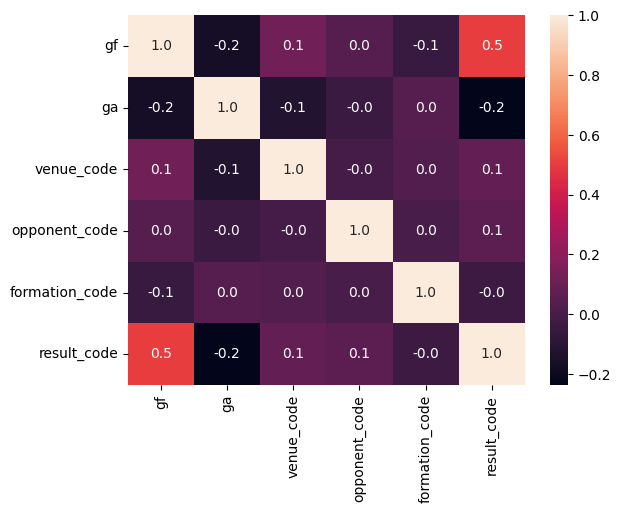

In [156]:
sns.heatmap(gamedata.corr(),annot=True, fmt='.1f')

Task 10 & 11 see README.md